In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency

from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms # datasets has MNIST dataset preloaded. called by datasets.MNIST

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix  # for evaluating results

import matplotlib.pyplot as plt

In [2]:
pwd # find current location of files

'/Users/n1r7/Desktop/pytorch/PYTORCH_NOTEBOOKS/03-CNN-Convolutional-Neural-Networks'

In [3]:
# convert MNIST image --> PyTorch tensors
#
# MNIST dataset contains 28x28 pixel images of handwritten digits labeled with 0-9

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform) # train=True for training

In [6]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform) # train=False for testing

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
type(train_data[0])

tuple

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image,label = train_data[0]

In [13]:
image.shape # 1 = black/white channel, 28px, 28px

torch.Size([1, 28, 28])

In [14]:
label

5

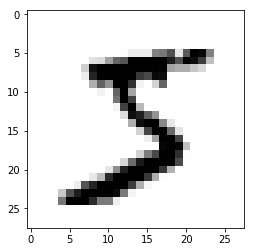

In [18]:
# imshow displays a 2D image

plt.imshow(image.reshape((28,28)),cmap='gist_yarg')

# matplotlib default color theme is viridis, it does not represent the actual color of the image
# cmap='gray', 'gist_yarg', 'viridis'

In [44]:
torch.manual_seed(101) # set manual seed to replicate results

# shuffle data to generalize training
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# shuffling data is not necessary because we are not adjusting weights based on results
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [45]:
from torchvision.utils import make_grid # import grid functionality

np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # helps with spacing of labels

In [46]:
# Define a for loop to take a look at the first batch
for images,labels in train_loader:
    break # exits for loop after first load
    
    # 60,000 images / 100 batch size = 60 times
    # to get only the first batch, break the loop after the function grabs the first batch

In [47]:
images.shape

torch.Size([100, 1, 28, 28])

In [48]:
#100 images, 1 color channel (grayscale), Width x Height=28x28 grid

In [49]:
labels.shape

torch.Size([100])

In [50]:
#100 labels

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


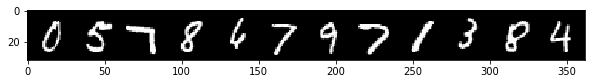

In [51]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))

# We need to transpose the images from CWH to WHC   (Color Width Height)
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

In [24]:
# MULTILAYER PERCEPTRON MODEL

In [52]:
class MultilayerPerceptron(nn.Module): # inherit from nn.Module
    
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]): # 28x28 = 784, 10 outputs (i.e. numbers)
        
        super().__init__() # instantiate n.Module
        
        # define fully connected layers (i.e. Linear)
        self.fc1 = nn.Linear(in_sz,layers[0]) # in=784, out=120
        self.fc2 = nn.Linear(layers[0],layers[1]) # in=120, out=84
        self.fc3 = nn.Linear(layers[1],out_sz) # in=84, out=10
    
    def forward(self,X):
        
        # X = data features
        X = F.relu(self.fc1(X)) # rectified linear unit activation
        X = F.relu(self.fc2(X)) # relu activation
        X = self.fc3(X) # multi-class classification problem, hence no RELU. pass through log_softmax in return
        
        return F.log_softmax(X, dim=1) # must specify a dimension aka axis

In [53]:
torch.manual_seed(101)

model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [54]:
# ANN ---> CNN
# CNN has fewer parameters and is more efficient than ANN
# write for loop to see the number of model parameters
for param in model.parameters():
    print(param.numel()) # numel is number of elements

94080
120
10080
84
840
10


In [55]:
# 784 x 120 = 94080
# 120 output neurons
# 120 x 84 = 10080
# 84 neurons
# 84 x 10 = 840
#10 output neurons

# 105214 total parameters

In [56]:
criterion = nn.CrossEntropyLoss() # multi-class problem
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [57]:
# need to flatten images ---> [100,784]
# combine last three dimensions into one (784=1*28*28)
images.shape

torch.Size([100, 1, 28, 28])

In [58]:
images.view(100,-1).shape # keep first 100 images, -1 says to combine the remainder of the dimensions

torch.Size([100, 784])

In [59]:
# TRAINING

import time
start_time = time.time()

# define number of epochs for training
epochs = 10


# create empty tracking lists
train_losses = []
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):
    
    trn_corr = 0 # training correct
    tst_corr = 0 # test correct
    
    for b, (X_train,y_train) in enumerate(train_loader): # b is batch, train_loaders returns image and its label
        
        b+=1 # start batches as 1
        
        y_pred = model(X_train.view(100,-1)) # 100=batch size previously defined, flatten training data with .view()
        loss = criterion(y_pred,y_train) # allows us to see results 
        
        # 10 output neurons represent 1-hot encodings
        # transform probabilities to a single digit
        # e.g., [0.1,0.0,....,0.8] ---> predicts 9
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad() # zero gradient
        loss.backward() # perform back propagation
        optimizer.step()
        
        # print out results during training
        if b%200 == 0:
            accuracy = trn_corr.item()*100/(100*b)
            print(f'Epoch {i}   batch {b}   loss {loss.item():.4f}   accuracy {accuracy:.2f}')
    
    # append to lists
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    # run test data during training
    with torch.no_grad(): # use with loop to not update weights and biases for test set
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
    
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)



total_time = time.time() - start_time
print(f'Duration: {total_time/60:.2f} mins')

Epoch 0   batch 200   loss 0.2806   accuracy 83.04
Epoch 0   batch 400   loss 0.2030   accuracy 87.33
Epoch 0   batch 600   loss 0.2023   accuracy 89.32
Epoch 1   batch 200   loss 0.1446   accuracy 94.56
Epoch 1   batch 400   loss 0.1049   accuracy 95.11
Epoch 1   batch 600   loss 0.1203   accuracy 95.35
Epoch 2   batch 200   loss 0.1163   accuracy 96.53
Epoch 2   batch 400   loss 0.0891   accuracy 96.61
Epoch 2   batch 600   loss 0.1010   accuracy 96.73
Epoch 3   batch 200   loss 0.0534   accuracy 97.48
Epoch 3   batch 400   loss 0.0514   accuracy 97.51
Epoch 3   batch 600   loss 0.0560   accuracy 97.53
Epoch 4   batch 200   loss 0.1292   accuracy 97.93
Epoch 4   batch 400   loss 0.0937   accuracy 98.00
Epoch 4   batch 600   loss 0.1239   accuracy 98.04
Epoch 5   batch 200   loss 0.0449   accuracy 98.30
Epoch 5   batch 400   loss 0.0491   accuracy 98.36
Epoch 5   batch 600   loss 0.0519   accuracy 98.37
Epoch 6   batch 200   loss 0.0032   accuracy 98.98
Epoch 6   batch 400   loss 0.07

In [60]:
# REVIEW RESULTS

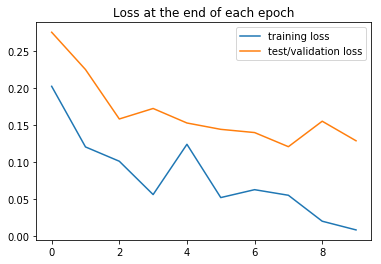

In [63]:
# Plot the loss at the end of each epoch
# Do not expect the test set to perform as well because it cannot adjust weights & biases

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='test/validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [65]:
# number correct / batch size = percentage correct

train_acc = [t/600 for t in train_correct]

In [66]:
test_acc = [t/100 for t in test_correct]

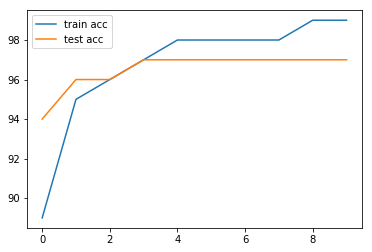

In [67]:
plt.plot(train_acc,label='train acc')
plt.plot(test_acc,label='test acc')
plt.legend()

In [68]:
# the crossing point is an approximation for epochs prior to overfitting issues
# after 8, we risk overfitting

In [70]:
# EVALUATE NEW UNSEEN DATA

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [71]:
with torch.no_grad():
    correct = 0
    
    for X_test,y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1)) # remember to flatten the data
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [72]:
# take correct tensor, divide by size of test data (10000) and multiply by 100 for precentage
correct.item()/len(test_data) * 100

97.59

In [73]:
# confusion matrix
# diagonal = number correct at each guess

confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 971,    0,    1,    0,    1,    2,    4,    1,    4,    2],
       [   0, 1120,    0,    0,    0,    0,    4,    3,    0,    2],
       [   1,    5, 1012,    6,    3,    0,    2,   11,    3,    0],
       [   2,    2,    6,  995,    1,   21,    1,    4,    4,   15],
       [   0,    0,    3,    0,  965,    2,    9,    3,    2,   14],
       [   0,    0,    0,    1,    0,  855,    2,    0,    2,    4],
       [   1,    2,    1,    0,    4,    5,  934,    0,    0,    0],
       [   0,    1,    3,    4,    2,    0,    0, 1003,    4,   12],
       [   3,    5,    6,    3,    1,    6,    2,    2,  953,    9],
       [   2,    0,    0,    1,    5,    1,    0,    1,    2,  951]])

In [74]:
# REVIEW MISSES

misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

241

In [75]:
# Display the first 10 index positions
misses[:10]

array([ 149,  247,  259,  273,  274,  321,  340,  381,  414,  434])

In [77]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Index: [ 149  247  259  273  274  321  340  381  414  434  445  447]
Label: [   2    4    6    9    9    2    5    3    9    9    6    4]
Guess: [   4    6    0    3    3    7    3    7    4    3    0    9]


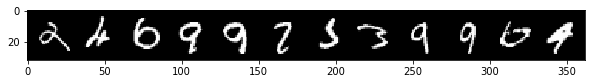

In [78]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));